In [1]:
import sys
print(sys.executable)

C:\Users\Disha Sharma\.conda\envs\analytics\python.exe


In [5]:
import sys
!"{sys.executable}" -m pip install rulefit

  Using cached rulefit-0.3.1.tar.gz (25 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for rulefit: filename=rulefit-0.3.1-py3-none-any.whl size=7877 sha256=6363872cd822264bdd640fce5f9498be1749f5d18e5e600ddef6a2af50c2c635
  Stored in directory: c:\users\disha sharma\appdata\local\pip\cache\wheels\0c\b7\1f\c3c2e1d101b3e6095e55ae4e727dd6cf413f0e800ab38d038e
Successfully built rulefit


In [7]:
from rulefit import RuleFit

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\Disha Sharma\Desktop\XAI\bike-sharing-dataset\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
df = df.sort_values("dteday")
df[["dteday", "cnt"]].head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [17]:
df['cnt_2d_bfr'] = df['cnt'].shift(2) 

In [19]:
df = df.dropna()

In [23]:
y = df["cnt"]

X = df.drop(columns=[
    "instant",
    "dteday",
    "cnt",
    "casual",
    "registered"
])

print(X.columns)
print("Shape:", X.shape)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt_2d_bfr'],
      dtype='object')
Shape: (729, 12)


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=3,
    random_state=42
)

In [27]:
rf = RuleFit(
    tree_generator=gb,
    rfmode="regress",
    model_type="rl"
)

In [29]:
rf.fit(X.values, y.values, feature_names=X.columns)

C:\Users\Disha Sharma\.conda\envs\analytics\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(
C:\Users\Disha Sharma\.conda\envs\analytics\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1682: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(
C:\Users\Disha Sharma\.conda\envs\analytics\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or con

,tree_size,4
,sample_fract,'default'
,max_rules,2000
,memory_par,0.01
,tree_generator,GradientBoost...dom_state=565)
,rfmode,'regress'
,lin_trim_quantile,0.025
,lin_standardise,True
,exp_rand_tree_size,True
,model_type,'rl'
,Cs,None


In [31]:
rules = rf.get_rules()
len(rules)

1289

In [33]:
rules_selected = rules[rules.coef != 0]

print("Total rules generated:", len(rules))
print("Rules selected by Lasso:", len(rules_selected))

Total rules generated: 1289
Rules selected by Lasso: 273


In [35]:
rules_selected = rules_selected.sort_values(
    "importance",
    ascending=False
)

rules_selected.head(10)

,rule,type,coef,support,importance
919,temp > 0.377083495259285 & weathersit <= 2.5,rule,334.755058,0.659808,158.598107
602,temp <= 0.4637500047683716,rule,-302.895580,0.455418,150.844577
251,temp > 0.5062500238418579 & yr > 0.5,rule,336.657007,0.252401,146.240375
314,weathersit <= 2.5 & season > 1.5,rule,267.044478,0.731139,118.398912
1191,atemp <= 0.3244810104370117 & cnt_2d_bfr <= 45...,rule,-291.907873,0.201646,117.121989
797,cnt_2d_bfr > 4683.0 & temp > 0.418332993984222...,rule,235.421673,0.378601,114.188549
978,atemp <= 0.26072950661182404 & temp <= 0.41875...,rule,-348.971688,0.116598,111.999237
49,temp <= 0.377083495259285 & cnt_2d_bfr <= 5352...,rule,250.928220,0.272977,111.785751
742,cnt_2d_bfr > 3835.5 & cnt_2d_bfr > 5705.5 & hu...,rule,257.667010,0.233196,108.958635
385,temp <= 0.8204165101051331 & yr > 0.5,rule,216.603439,0.495199,108.296727


In [43]:
rules_all = rf.get_rules()

rules_all.head()

,rule,type,coef,support,importance
0,season,linear,0.0,1.0,0.0
1,yr,linear,0.0,1.0,0.0
2,mnth,linear,0.0,1.0,0.0
3,holiday,linear,0.0,1.0,0.0
4,weekday,linear,-0.0,1.0,0.0


In [45]:
import re
import pandas as pd

rules_all = rf.get_rules()

# Keep only non-zero coefficients
rules_nonzero = rules_all[rules_all.coef != 0]

feature_importance = {}

for _, row in rules_nonzero.iterrows():
    rule = row["rule"]
    importance = row["importance"]
    
    # Extract feature names appearing in the rule
    features_in_rule = re.findall(r"[a-zA-Z_]+", rule)
    
    for feature in features_in_rule:
        if feature in X.columns:
            feature_importance[feature] = feature_importance.get(feature, 0) + importance

# Convert to DataFrame
feature_importance_df = pd.DataFrame(
    feature_importance.items(),
    columns=["feature", "importance"]
)

feature_importance_df = feature_importance_df.sort_values(
    "importance",
    ascending=False
)

feature_importance_df.head(10)

,feature,importance
3,temp,3170.436429
2,hum,2616.460293
5,atemp,1775.703198
0,windspeed,1710.922558
6,yr,1522.259624
7,season,808.790416
1,weathersit,787.024654
8,mnth,749.870169
4,weekday,696.421578
9,workingday,422.319671


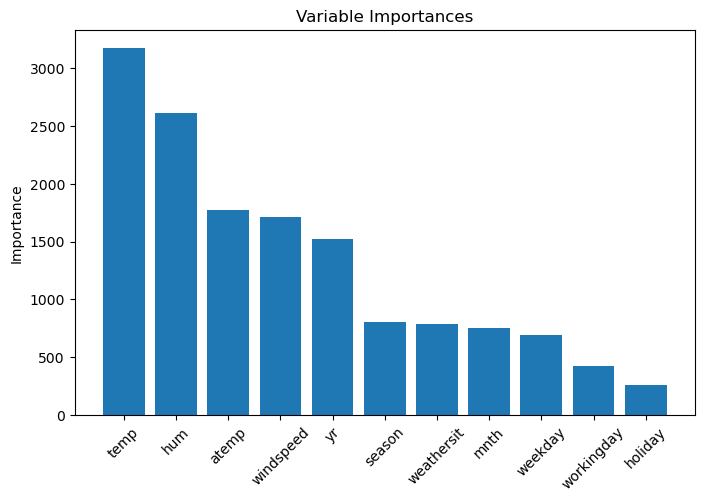

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(
    feature_importance_df["feature"],
    feature_importance_df["importance"]
)

plt.xticks(rotation=45)
plt.title("Variable Importances")
plt.ylabel("Importance")
plt.show()

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_pred = rf.predict(X.values)

# R squared
r2 = r2_score(y, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("R squared:", r2)
print("RMSE:", rmse)

R squared: 0.9803610986628113
RMSE: 270.36395890184156
